In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## 1) How many unique Countries Data we're having in the dataset?

In [3]:
countries = df.nunique()['Country Name']
print(f"We have {countries} countries' data in our dataset")

We have 256 countries' data in our dataset


## 2) How many years of Data we're having for India

In [4]:
years = df.nunique()['Year']
print(f"We have {years} years' data in our dataset")

We have 57 years' data in our dataset


## 3) Whats the world GDP in 1969?

In [44]:
data = df[df['Year'] == 1969]['Value']/152
data.sum()

128797378811.16142

## 4) Whats the % of GDP growth of India in Year 1994 (*as compare to 1993)?

In [6]:
ind_1993 = df[(df['Year'] == 1993) & (df['Country Name'] == 'India')]['Value'].values[0]
ind_1994 = df[(df['Year'] == 1994) & (df['Country Name'] == 'India')]['Value'].values[0]
percent = (ind_1994-ind_1993)*100/ind_1993
print(f"The percentage growth of gdp of india form 1993 to 1994 is {percent:0.2f}%")

The percentage growth of gdp of india form 1993 to 1994 is 17.18%


# Tasks

### 1) Find GDP Growth of India from 1960 - 2016
### 2) Create a new columns named as GDP which shows the GDP growth of each country for that year
### 3) Create a graph of GDP Growth of India from 1960 - 2016

## Solution 1 & 3

<AxesSubplot:xlabel='Year'>

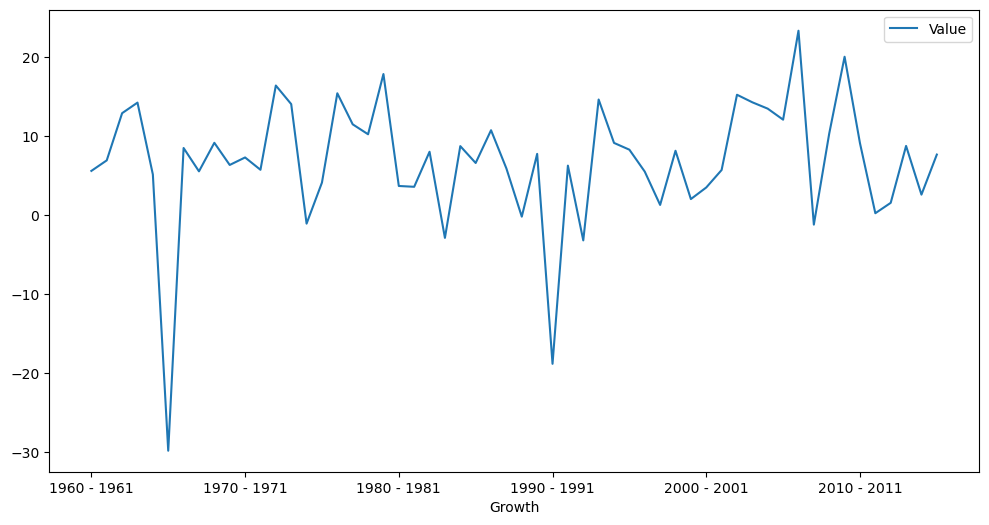

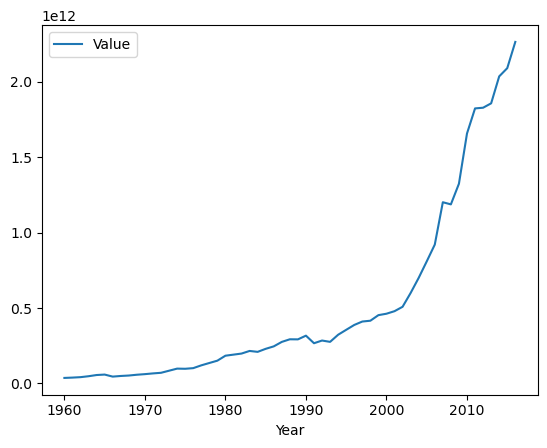

In [7]:
gdp_ind = df[(df['Year'] >= 1960) & (df['Year'] <= 2016) & (df['Country Name'] == 'India')]
growth_percentage = ((gdp_ind['Value'].diff()/gdp_ind['Value'])*100).iloc[1:]
Ind_data = pd.DataFrame({'Value' : growth_percentage.values})
Ind_data['Growth'] = np.zeros(56)
for i in range(Ind_data.shape[0]):
    Ind_data['Growth'].iloc[i] = f"{1960+i} - {1960+1+i}"
Ind_data.set_index('Growth', inplace=True)
Ind_data.plot(kind = 'line', figsize=(12, 6))
gdp_ind.plot(kind = 'line', x = 'Year', y = 'Value')